<h2>Heart Disease ML </h2>

<h4>This dataset is used to predict the 10-year risk of CHD (Coronary Heart Disease). </h4>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier

In [2]:
file = '/Users/munjismac/code/munjik/personal-projects/heart_disease/heart.csv'

In [3]:
heart_df = pd.read_csv(file)

In [4]:
heart_df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [5]:
heart_df.shape

(303, 14)

In [6]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<h2>Feature Selection</h2>

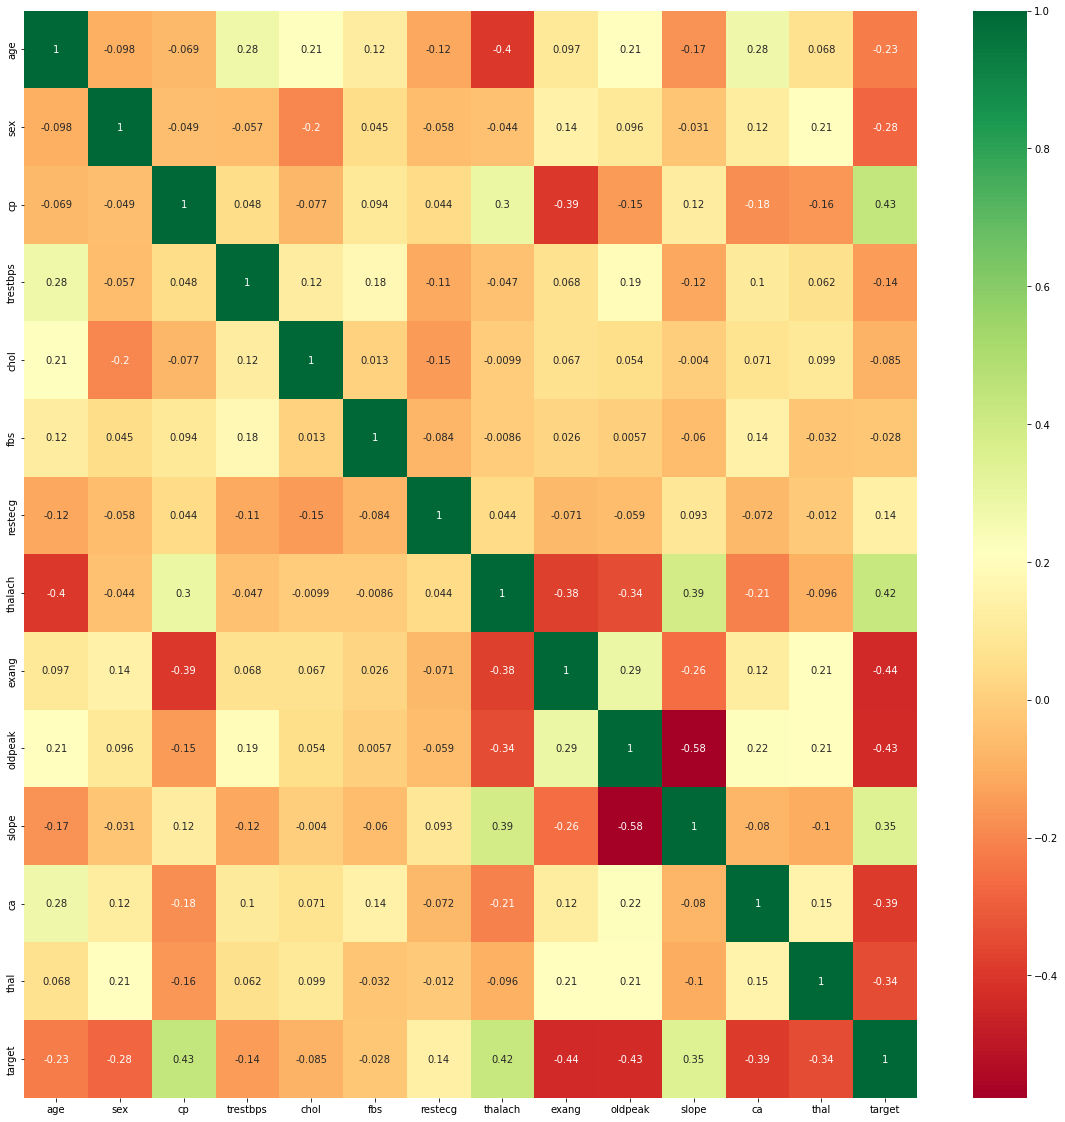

In [8]:
corrmat = heart_df.corr()
top_corr_features = corrmat.index #grabs the index of each column (the name in this case)
plt.figure(figsize=(20,20))
#plot heat map
g = sns.heatmap(heart_df[top_corr_features].corr(), annot=True,cmap="RdYlGn")

In [9]:
# which features correlated with the output variable, in this case over 0.3.
# df = heart_df
# df['Y'] = heart_df['target']
corr = heart_df.corr()
corr_y = abs(corr['target'])
highest_corr = corr_y[corr_y >0.3]
highest_corr.sort_values(ascending=True)

thal       0.344029
slope      0.345877
ca         0.391724
thalach    0.421741
oldpeak    0.430696
cp         0.433798
exang      0.436757
target     1.000000
Name: target, dtype: float64

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

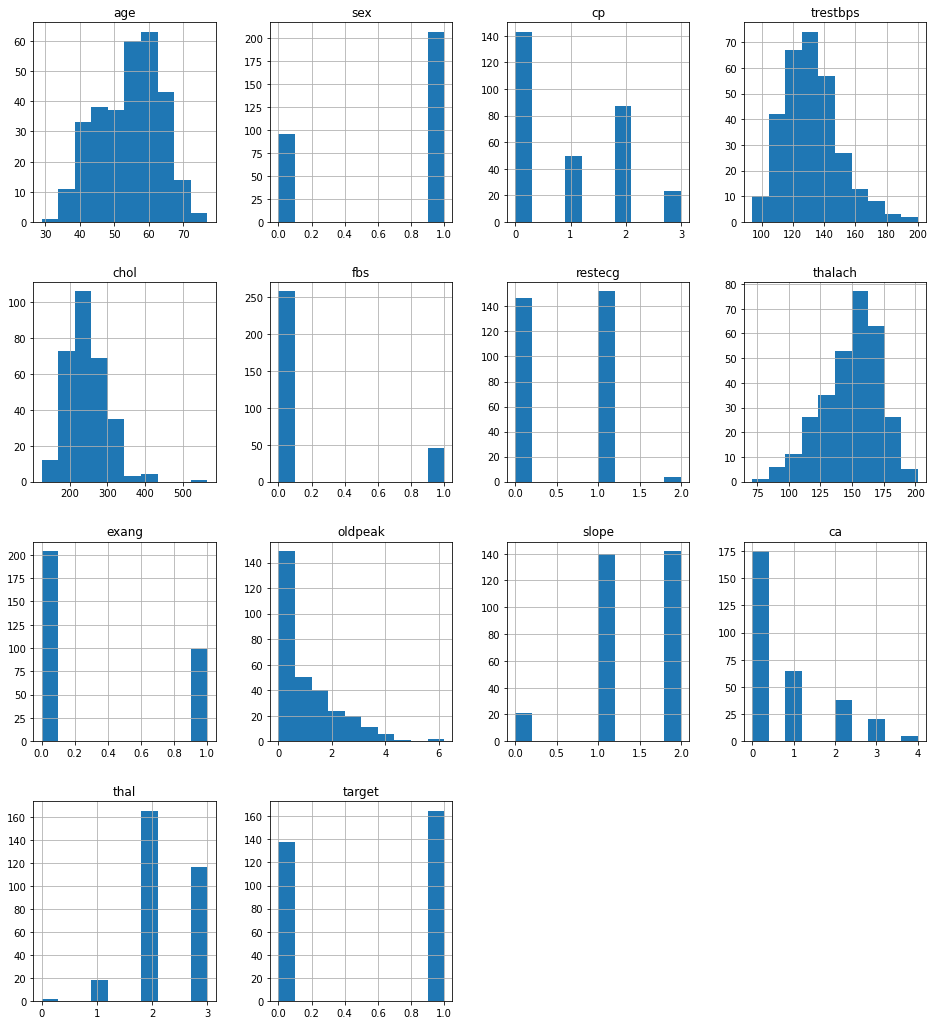

In [10]:
heart_df.hist(figsize = (16,18))

<h3> So, we need to balance the dataset or otherwise it might get overfit </h3>

<AxesSubplot:xlabel='target', ylabel='count'>

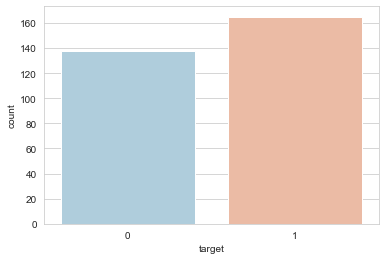

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='target', data=heart_df, palette='RdBu_r')
#we see the class is roughly 45% 55% so this is balanced

In [12]:
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
heart_df.shape

(303, 14)

In [14]:
heart_df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [15]:
# scaling
standard_scaler = StandardScaler()

In [16]:
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach','oldpeak']
heart_df[columns_to_scale] = StandardScaler().fit_transform(heart_df[columns_to_scale])

In [17]:
# split the data into feature data and target data
X = heart_df.drop(['target'], axis = 1)
y = heart_df['target']

In [18]:
model = KNeighborsClassifier(n_neighbors=3)

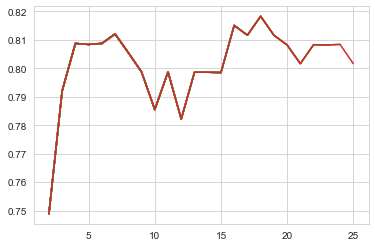

In [19]:
score_list = []
k_list = []
for results in range(2,26):
    k_list.append(results)
    cv_results = cross_validate(KNeighborsClassifier(n_neighbors=results), X, y, cv = 10)
    mean_score = np.mean(cv_results['test_score'])
    score_list.append(mean_score)
    plt.plot(k_list, score_list)

In [20]:
best_k = 7
model = KNeighborsClassifier(n_neighbors=best_k)
cv_results = cross_validate(model, X,y, cv = 10)
cv_results['test_score'].mean()

0.8120430107526883

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

cv_scores = cross_validate(model, X_train, y_train, cv = 10)
cv_score_mean = np.mean(cv_scores['test_score'])
print(cv_score_mean)
model.fit(X_train, y_train)
model.score(X_test,y_test)


0.8166666666666667


0.8241758241758241